In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
# Ex. 1.

df = pd.read_csv("https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt?dl=1")
rows_number = len(df)
print("Total number of rows in the dataset:",rows_number)

N = np.random.randint(10000, rows_number)
print("Random number N between 10k and the total number of rows:",N)
print("Pandas DataFrame reading N rows of the dataset:")
partial_df = df.head(N) #Return the first N rows
partial_df

Total number of rows in the dataset: 1310720
Random number N between 10k and the total number of rows: 510379
Pandas DataFrame reading N rows of the dataset:


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
510374,1,0,64,3869205328,441,7
510375,1,1,18,3869205328,445,23
510376,1,0,48,3869205328,448,0
510377,1,1,6,3869205328,456,11


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [10]:
# Ex. 2.

#The number of BX in a ORBIT is the maximum value of BX_COUNTER before reset (add 1 because counting starts from 0)
x = df['BX_COUNTER'].max() + 1
print('Number of BX in a ORBIT:',x)

Number of BX in a ORBIT: 3564


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [4]:
# Ex. 3.

df['TIME'] = df['TDC_MEAS']*25/30 + df['BX_COUNTER']*25 + df['ORBIT_CNT']*25*x
print("DataFrame with a new column with the absolute time in ns:")
df

DataFrame with a new column with the absolute time in ns:


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [5]:
# Ex. 3. and Ex. 4.

df['TIME'] = pd.to_datetime(df['TIME'])
print("TIME column of the dataframe has been converted from ns to days hours:minutes:seconds.nanoseconds:\n")
print(df)

time0 = pd.to_datetime(df.loc[df.index[0], 'TIME'])
df['TIME'] = pd.to_datetime(df['TIME']) - time0
print("\nTIME column of the dataframe has been converted from absolute time to relative time:")
df

TIME column of the dataframe has been converted from ns to days hours:minutes:seconds.nanoseconds:

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                                 TIME  
0       1970-01-04 

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,0 days 00:00:00
1,1,0,124,3869200167,2374,27,0 days 00:00:00.000000001
2,1,0,63,3869200167,2553,28,0 days 00:00:00.000004477
3,1,0,64,3869200167,2558,19,0 days 00:00:00.000004594
4,1,0,64,3869200167,2760,25,0 days 00:00:00.000009649
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,0 days 00:00:00.980416090
1310716,1,1,4,3869211171,763,11,0 days 00:00:00.980416113
1310717,1,0,64,3869211171,764,0,0 days 00:00:00.980416129
1310718,1,0,139,3869211171,769,0,0 days 00:00:00.980416254


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
# Ex. 5.

group = df.groupby(['TDC_CHANNEL']).count()
group = group.sort_values(by = 'HEAD', ascending = False)["HEAD"]

print("First three TDC channels with most counts are (TDC_CHANNEL/counts):\n\n", group.head(3))

First three TDC channels with most counts are (TDC_CHANNEL/counts):

 TDC_CHANNEL
139    108059
64      66020
63      64642
Name: HEAD, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [11]:
# Ex. 6.

print('Number of orbits:',df['ORBIT_CNT'].count())
print('Number of non-empty orbits:',df['ORBIT_CNT'][df['ORBIT_CNT'] > 0].count())

Number of orbits: 1310720
Number of non-empty orbits: 1310720


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [12]:
# Ex. 7.

print('Number of unique orbits:',df['ORBIT_CNT'].nunique())

print('\nNumber of unique orbits with at least one measurement from TDC_CHANNEL=139:')
print(df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique())

Number of unique orbits: 11001

Number of unique orbits with at least one measurement from TDC_CHANNEL=139:
10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [7]:
# Ex. 8.

df_FPGA0 = df[df['FPGA'] == 0]
df_FPGA1 = df[df['FPGA'] == 1]

group0 = df_FPGA0.groupby(['TDC_CHANNEL']).count()
group1 = df_FPGA1.groupby(['TDC_CHANNEL']).count()

sr0 = pd.Series(group0['HEAD'], index=group0.index)
sr1 = pd.Series(group1['HEAD'], index=group1.index)

print('FPGA0 (TDC_CHANNEL/counts):\n')
print(sr0)

print('\n\nFPGA1 (TDC_CHANNEL/counts):\n')
print(sr1)

FPGA0 (TDC_CHANNEL/counts):

TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Name: HEAD, Length: 124, dtype: int64


FPGA1 (TDC_CHANNEL/counts):

TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Name: HEAD, Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

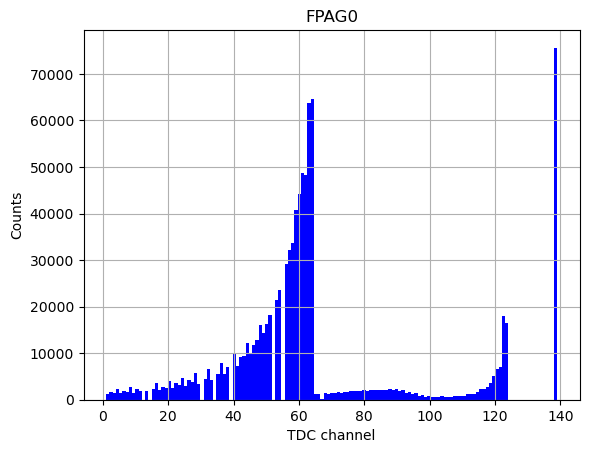

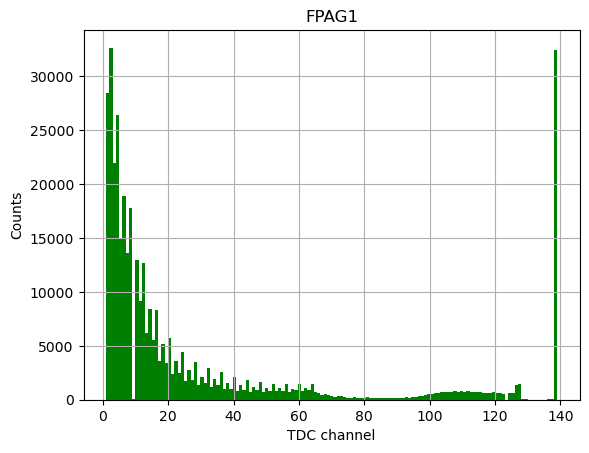

In [9]:
# Ex. 9.

df_FPGA0['TDC_CHANNEL'].hist(bins = df_FPGA0['TDC_CHANNEL'].max(), color='blue')
plt.xlabel('TDC channel')
plt.ylabel('Counts')
plt.title('FPAG0')
plt.show()

df_FPGA1['TDC_CHANNEL'].hist(bins = df_FPGA1['TDC_CHANNEL'].max(), color='green')
plt.xlabel('TDC channel')
plt.ylabel('Counts')
plt.title('FPAG1')
plt.show()